In [273]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style("whitegrid")

In [242]:
data = pd.read_csv("/Users/dominiquekemp/Downloads/Outscraper-20250306234315s02_restaurant 4.csv")
print(data.shape)
del data['query']

(3786, 94)


In [243]:
len(data[data.state.isnull() == True]), len(data[data.state == 'New Jersey']), len(data[data.state == "New York"])

(2, 6, 4)

In [244]:
#clear data of out-of-state restaurants
data = data[(data.state == 'PA') | (data.state == 'Pennsylvania')]


In [245]:

data.columns

Index(['name', 'name_for_emails', 'site', 'subtypes', 'category', 'type',
       'phone', 'full_address', 'borough', 'street', 'city', 'postal_code',
       'state', 'us_state', 'country', 'country_code', 'latitude', 'longitude',
       'h3', 'time_zone', 'plus_code', 'area_service', 'rating', 'reviews',
       'reviews_link', 'reviews_tags', 'reviews_per_score',
       'reviews_per_score_1', 'reviews_per_score_2', 'reviews_per_score_3',
       'reviews_per_score_4', 'reviews_per_score_5', 'photos_count', 'photo',
       'street_view', 'located_in', 'working_hours',
       'working_hours_old_format', 'other_hours', 'popular_times',
       'business_status', 'about', 'range', 'posts', 'logo', 'description',
       'typical_time_spent', 'verified', 'owner_id', 'owner_title',
       'owner_link', 'reservation_links', 'booking_appointment_link',
       'menu_link', 'order_links', 'location_link', 'location_reviews_link',
       'place_id', 'google_id', 'cid', 'kgmid', 'reviews_id',
       

In [246]:
#determine tallies of missing values by column
miss_values = pd.isnull(data).sum()
miss_values

name                      0
name_for_emails           1
site                   1209
subtypes                  1
category                  2
                       ... 
company_sales          3774
company_sales_code     3774
number_of_employees    3774
employee_code          3774
company_num_emp        3774
Length: 93, dtype: int64

In [247]:
#remove all fully incomplete columns 
for index in data.columns:
    if miss_values[index] == 3786:
        del data[index]

print(data.shape)
#drop redundant columns
data = data.drop(["city", 'state', 'us_state', 'country', 'country_code', 'time_zone'], axis = 1)
data.columns

(3774, 93)


Index(['name', 'name_for_emails', 'site', 'subtypes', 'category', 'type',
       'phone', 'full_address', 'borough', 'street', 'postal_code', 'latitude',
       'longitude', 'h3', 'plus_code', 'area_service', 'rating', 'reviews',
       'reviews_link', 'reviews_tags', 'reviews_per_score',
       'reviews_per_score_1', 'reviews_per_score_2', 'reviews_per_score_3',
       'reviews_per_score_4', 'reviews_per_score_5', 'photos_count', 'photo',
       'street_view', 'located_in', 'working_hours',
       'working_hours_old_format', 'other_hours', 'popular_times',
       'business_status', 'about', 'range', 'posts', 'logo', 'description',
       'typical_time_spent', 'verified', 'owner_id', 'owner_title',
       'owner_link', 'reservation_links', 'booking_appointment_link',
       'menu_link', 'order_links', 'location_link', 'location_reviews_link',
       'place_id', 'google_id', 'cid', 'kgmid', 'reviews_id',
       'located_google_id', 'company_name', 'legal_name', 'business_type',
       '

In [248]:
missing_values = pd.isnull(data).sum()
missing_values

name                      0
name_for_emails           1
site                   1209
subtypes                  1
category                  2
                       ... 
company_sales          3774
company_sales_code     3774
number_of_employees    3774
employee_code          3774
company_num_emp        3774
Length: 87, dtype: int64

In [249]:
#delete 'located_google_id' column since only one filled entry
del data['located_google_id']

In [250]:
#remove 'located_in' for same reason, as well as restaurants with missing target feature
del data['located_in']
df = data[data.rating.isnull() == False]

In [251]:
df.shape
missing_values = df.isnull().sum()
missing_values

name                      0
name_for_emails           1
site                   1122
subtypes                  1
category                  2
                       ... 
company_sales          3659
company_sales_code     3659
number_of_employees    3659
employee_code          3659
company_num_emp        3659
Length: 85, dtype: int64

In [252]:
#record of the businesses that are closed permamently or temporarily
closed = df.loc[df.business_status != 'OPERATIONAL']
df_nonoper = pd.get_dummies(closed['business_status'])
df_nonoper

,CLOSED_PERMANENTLY,CLOSED_TEMPORARILY
96,True,False
154,False,True
155,False,True
156,False,True
157,False,True
...,...,...
3598,False,True
3599,False,True
3678,False,True
3679,False,True


In [253]:
df.iloc[153:159]

,name,name_for_emails,site,subtypes,category,type,phone,full_address,borough,street,...,owner_phone,ethnicity,url,sales_volume,sales_code,company_sales,company_sales_code,number_of_employees,employee_code,company_num_emp
154,Bing Bing Dim Sum,Bing Bing Dim Sum,NaN,"Chinese restaurant, Asian fusion restaurant, A...",restaurants,Chinese restaurant,NaN,"1648 E Passyunk Ave, Philadelphia, PA 19148",East Passyunk Crossing,1648 E Passyunk Ave,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,Black Cat Tavern on 12th,Black Cat Tavern On 12Th,http://www.blackcattavernphilly.com/,"Gastropub, Art gallery, ATM, Cocktail bar, Ecl...",restaurants,Gastropub,+1 267-519-3574,"2654 S 12th St, Philadelphia, PA 19148",Lower Moyamensing,2654 S 12th St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,SciFood-Crown,Scifood Crown,NaN,Restaurant,restaurants,Restaurant,+1 908-487-8687,"330 Oregon Ave, Philadelphia, PA 19148",South Philadelphia East,330 Oregon Ave,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,Pizza Shop,Pizza Shop,http://pizzashop.com/,"Pizza restaurant, Cheesesteak restaurant, Fast...",restaurants,Pizza restaurant,+1 215-551-3333,"2700 S 7th St, Philadelphia, PA 19148",South Philadelphia East,2700 S 7th St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,Stadium Pizza & Grill,Stadium Pizza And Grill,NaN,"Pizza restaurant, Italian restaurant, Delivery...",restaurants,Pizza restaurant,+1 215-755-5411,"2400 S 10th St, Philadelphia, PA 19148",Lower Moyamensing,2400 S 10th St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,La Tienda,La Tienda,http://orderlatienda.com/,"Mexican restaurant, Grocery store, Mexican gro...",restaurants,Mexican restaurant,+1 215-334-1159,"1247 Snyder Ave, Philadelphia, PA 19148",East Passyunk Crossing,1247 Snyder Ave,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [254]:
#record cuisine features 
cuisines= data.type.unique()
print(cuisines, cuisines.shape)

['Restaurant' 'Diner' 'Italian restaurant' 'Bar' 'Brunch restaurant'
 'Gastropub' 'Sicilian restaurant' 'American restaurant'
 'Cambodian restaurant' 'Asian restaurant' 'Thai restaurant' 'Steak house'
 'Vietnamese restaurant' 'Breakfast restaurant' 'Hamburger restaurant'
 'Mexican restaurant' 'Honduran restaurant' 'Bar & grill'
 'Cheesesteak restaurant' 'Indian restaurant' 'Taco restaurant'
 'Swedish restaurant' 'Spanish restaurant' 'Pizza restaurant'
 'Chinese restaurant' 'French restaurant' 'Delivery Chinese restaurant'
 'Sandwich shop' 'Southern restaurant (US)' 'Indonesian restaurant'
 'Mediterranean restaurant' 'Latin American restaurant' 'Event venue'
 'Chicken restaurant' 'Halal restaurant' 'Barbecue restaurant'
 'New American restaurant' 'Cafe' 'Fast food restaurant'
 'Seafood restaurant' 'Vegan restaurant' 'Caribbean restaurant'
 'Takeout Restaurant' 'Pizza Takeout' 'West African restaurant'
 'Colombian restaurant' 'Portuguese restaurant' 'Brazilian restaurant'
 'Korean restau

In [255]:
#determine redundant columns 
print(df[(df.booking_appointment_link.isnull() == True) & ((df.order_links.isnull() == False) | (df.reservation_links.isnull() == False))].shape)
print(df[(df.verified.isnull() == True) & ((df.owner_link.isnull() == False) | (df.owner_id.isnull() == False))].shape)

#consolidate and delete unnecessary info
del  df['logo'], df['owner_title'], df['owner_id'], df['owner_link'], df['street_view'], df['working_hours'], df['verified'], df['name_for_emails'], df['area_service'], df['reservation_links'], df['order_links']

(0, 85)
(0, 85)


In [256]:
#convert some columns to Boolean data
missing_values = df.isnull().sum()
print(missing_values)
rd = df.copy()
rd['site'] = (df.site.isnull() == False)
rd['phone'] = (df.phone.isnull() == False)
rd['booking_appointment_link'] = (df.booking_appointment_link.isnull() == False)

#convert missing values in 'range'
rd.range = rd.range.fillna(0)

#ensure that there is sufficient customer feedback
rd = rd[rd.reviews > 29]

name                      0
site                   1122
subtypes                  1
category                  2
type                      1
                       ... 
company_sales          3659
company_sales_code     3659
number_of_employees    3659
employee_code          3659
company_num_emp        3659
Length: 74, dtype: int64


In [257]:
rd.type.unique().shape

(186,)

In [258]:
#targets chosen based on customer engagement
targets = ['rating', 'reviews', 'photos_count']

#target for business 
targets_b = ['range', 'business_status']
targets_b_full = targets_b + ['working_hours_old_format', 'other_hours']

In [259]:
#primary features for customer targets
features = ['type', 'category', 'site','phone', 'booking_appointment_link', 'range', 'latitude','longitude', 'postal_code', 'borough', 'working_hours_old_format', 'other_hours', 'range', 'photos_count', 'reviews_per_score_1', 'reviews_per_score_2']

In [274]:
from sklearn.model_selection import train_test_split

rd_train, rd_test = train_test_split(rd,
                                            test_size=0.2,
                                            random_state=50201,
                                            shuffle=True)



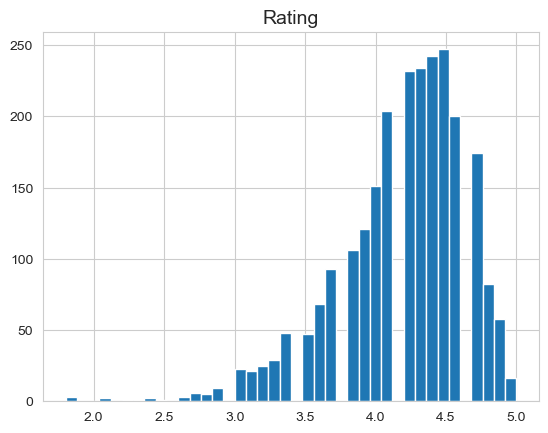

In [275]:
plt.hist(rd_train.rating, bins = 40)

plt.title('Rating', fontsize = 14)
plt.show()

In [276]:
rd_train.borough.unique().shape, rd_train.postal_code.unique().shape

((58,), (68,))

In [277]:
ranges = list(rd_train.range.unique())

org_r = {x: rd_train[rd_train.range == x].rating for x in ranges}
reviews_by_range = pd.DataFrame(org_r)
reviews_by_range


,0,$,$$,$$$,$$$$,3 stars,2 stars
0,NaN,NaN,4.6,NaN,NaN,NaN,NaN
1,4.5,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,4.3,NaN,NaN,NaN,NaN,NaN
3,4.7,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,4.5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3779,4.6,NaN,NaN,NaN,NaN,NaN,NaN
3780,NaN,4.1,NaN,NaN,NaN,NaN,NaN
3781,NaN,NaN,4.6,NaN,NaN,NaN,NaN
3783,NaN,4.3,NaN,NaN,NaN,NaN,NaN


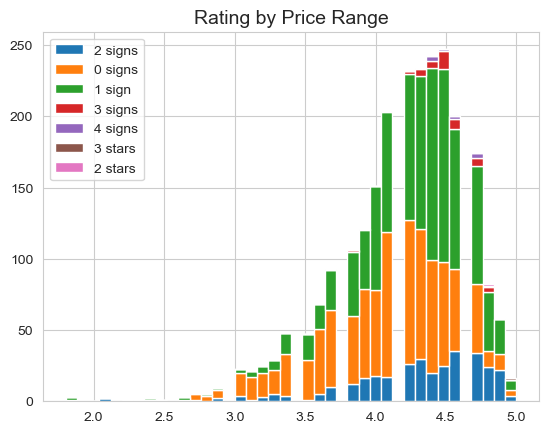

In [278]:
fig, ax = plt.subplots()
ranges = [ '2 signs', '0 signs', '1 sign', '3 signs', '4 signs'] + ranges[-2:]
ax.hist(reviews_by_range, bins = 40,  histtype = 'barstacked', label = ranges)
ax.legend()
ax.set_title('Rating by Price Range', fontsize = 14)
plt.show()

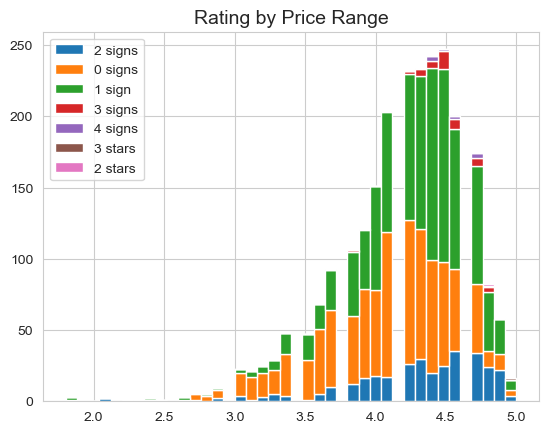

In [279]:
fig, ax = plt.subplots()
ranges = [ '2 signs', '0 signs', '1 sign', '3 signs', '4 signs'] + ranges[-2:]
ax.hist(reviews_by_range, bins = 40, stacked = True, label = ranges)

ax.legend()
ax.set_title('Rating by Price Range', fontsize = 14)
plt.show()

In [280]:
rd_train.columns

Index(['name', 'site', 'subtypes', 'category', 'type', 'phone', 'full_address',
       'borough', 'street', 'postal_code', 'latitude', 'longitude', 'h3',
       'plus_code', 'rating', 'reviews', 'reviews_link', 'reviews_tags',
       'reviews_per_score', 'reviews_per_score_1', 'reviews_per_score_2',
       'reviews_per_score_3', 'reviews_per_score_4', 'reviews_per_score_5',
       'photos_count', 'photo', 'working_hours_old_format', 'other_hours',
       'popular_times', 'business_status', 'about', 'range', 'posts',
       'description', 'typical_time_spent', 'booking_appointment_link',
       'menu_link', 'location_link', 'location_reviews_link', 'place_id',
       'google_id', 'cid', 'kgmid', 'reviews_id', 'company_name', 'legal_name',
       'business_type', 'company_year_started', 'naics', 'naics_desc',
       'sic6code', 'sic6desc', 'business_specialty',
       'state_where_entity_formed', 'ein', 'public', 'chain', 'franchise',
       'home_office', 'parent_company', 'telephone', 

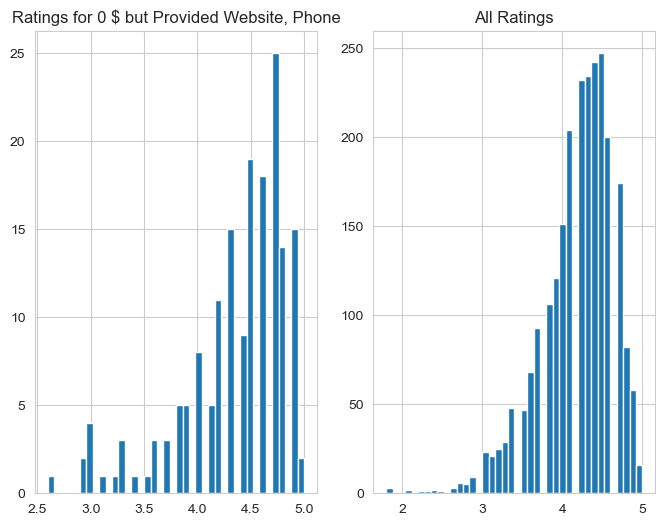

In [281]:
fig, axes = plt.subplots(1,2, figsize = (8,6))
axes[0].hist(rd_train[(rd_train.range == 0) & (rd_train.site == True) &(rd_train.phone == True)].rating, bins = 40)
axes[0].set_title('Ratings for 0 $ but Provided Website, Phone')

axes[1].hist(rd_train.rating, bins = 40)
axes[1].set_title('All Ratings')
plt.show()

In [290]:
rd_train.borough.unique().shape

(58,)

/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/matplotlib/axes/_axes.py:7065: RuntimeWarning:

All-NaN slice encountered

/opt/anaconda3/envs/erdos_spring_2025/lib/python3.12/site-packages/matplotlib/axes/_axes.py:7066: RuntimeWarning:

All-NaN slice encountered



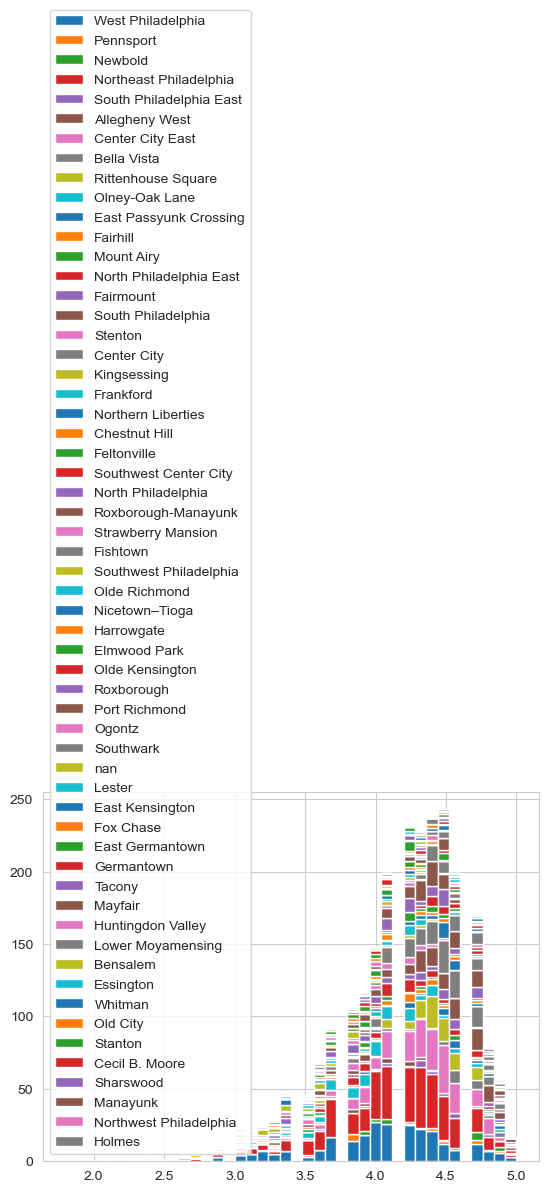

In [289]:
rating_by_borough = {x: rd_train[rd_train.borough == x].rating for x in rd_train.borough.unique()}
rating_by_borough = pd.DataFrame(rating_by_borough)
plt.hist(rating_by_borough, bins = 40, stacked = True, label = rd_train.borough.unique())
plt.legend()
plt.show()

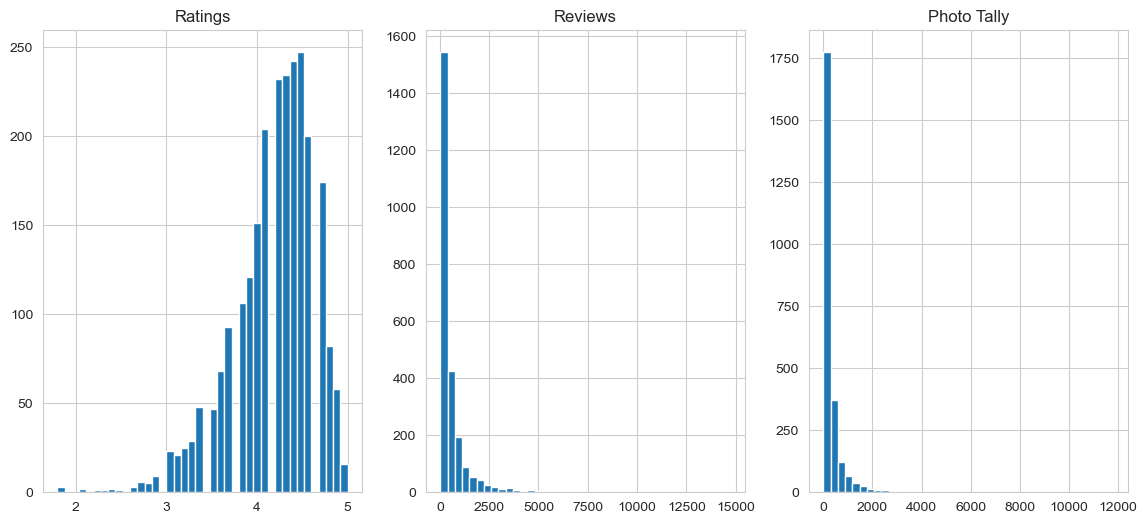

Number of restaurants is:  3068 . 'Reviews' bin size =  368.375 . 'Photo' bin size =  295.25


In [283]:
fig, axes = plt.subplots(1,3, figsize = (14,6))
axes[0].hist(rd_train.rating, bins = 40)
axes[0].set_title('Ratings')

axes[1].hist(rd_train.reviews, bins = 40)
axes[1].set_title('Reviews')

axes[2].hist(rd_train.photos_count, bins = 40)
axes[2].set_title('Photo Tally')
plt.show()
print("Number of restaurants is: ", len(rd), ". 'Reviews' bin size = ", 14735/40, ". 'Photo' bin size = ", 11810/40)

In [284]:
#Summary statistics for reviews and photos count
print(rd_train.reviews.describe(), "\n")
print(rd_train.photos_count.describe())

#note there is wider distribution as the scores increase

count     2454.000000
mean       554.036267
std        840.857346
min         30.000000
25%        122.250000
50%        278.000000
75%        621.750000
max      14735.000000
Name: reviews, dtype: float64 

count     2454.000000
mean       302.332518
std        555.179323
min          1.000000
25%         51.000000
50%        128.000000
75%        325.750000
max      11810.000000
Name: photos_count, dtype: float64


In [285]:
fig = px.density_mapbox(rd_train, lat='latitude', lon='longitude', z='rating', radius=2, zoom=10,
                        mapbox_style="open-street-map")
fig.show()

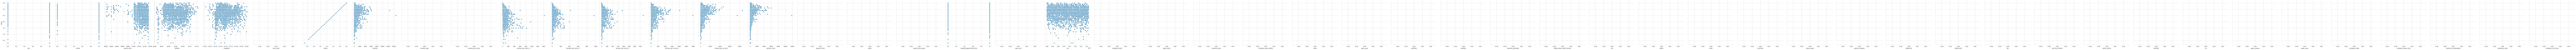

In [287]:
sns.pairplot(rd_train,
                y_vars = ['rating'],
                x_vars = features.remove("range"),
                height = 5,
                diag_kind = None)

plt.show()

In [288]:
rd_train.shape

(2454, 74)